## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import  matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Superstore.csv", encoding='ISO-8859-1')
df.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
8420,8421,CA-2017-118199,5/9/2017,5/11/2017,First Class,LB-16795,Laurel Beltran,Home Office,United States,Seattle,...,98105,West,TEC-AC-10004171,Technology,Accessories,Razer Kraken 7.1 Surround Sound Over Ear USB G...,199.980,2,0.0,87.9912
1849,1850,CA-2015-160472,7/20/2015,7/25/2015,Second Class,RK-19300,Ralph Kennedy,Consumer,United States,South Bend,...,46614,Central,OFF-ST-10000464,Office Supplies,Storage,"Multi-Use Personal File Cart and Caster Set, T...",34.760,1,0.0,9.7328
5493,5494,CA-2014-105249,11/28/2014,11/28/2014,Same Day,DH-13675,Duane Huffman,Home Office,United States,San Francisco,...,94122,West,OFF-LA-10002043,Office Supplies,Labels,Avery 489,41.400,4,0.0,19.8720
4458,4459,CA-2017-105851,3/13/2017,3/20/2017,Standard Class,SE-20110,Sanjit Engle,Consumer,United States,Denver,...,80219,West,OFF-SU-10002881,Office Supplies,Supplies,Martin Yale Chadless Opener Electric Letter Op...,1332.496,2,0.2,-299.8116
6929,6930,CA-2016-140382,6/23/2016,6/25/2016,Second Class,RD-19900,Ruben Dartt,Consumer,United States,San Francisco,...,94109,West,TEC-PH-10003012,Technology,Phones,Nortel Meridian M3904 Professional Digital phone,862.344,7,0.2,97.0137


## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
#checking For duplicated rows
df.duplicated().sum()

np.int64(0)

## Data analysis & Visualization 

In [7]:
df['Discount percentage']=df['Discount']*100
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Discount percentage
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0.0
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0.0
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,0.0
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,45.0
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,20.0


In [8]:
# Calculate the discount amount in dollars for each product 
df['Discount Amount'] = (df['Sales'] / (1 - df['Discount'])) * df['Discount']
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Discount percentage,Discount Amount
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0.0,0.0000
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0.0,0.0000
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,0.0,0.0000
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,45.0,783.4725
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,20.0,5.5920


In [9]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Discount percentage,Discount Amount
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896,15.620272,56.707442
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108,20.645197,360.887222
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000,0.000000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750,0.000000,0.000000
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500,20.000000,1.336000
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000,20.000000,23.995500
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,80.000000,22638.480000


## What is the sales trend over time (monthly, yearly)?

In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Month'] = df['Order Date'].dt.strftime('%B')
df['Order Month-Year'] = df['Order Date'].dt.strftime('%Y-%m')
df['Order Year'] = df['Order Date'].dt.strftime('%Y')

In [11]:
monthly_sales =df.groupby('Order Month')['Sales'].sum().reset_index()
month_of_year_sales = df.groupby('Order Month-Year').agg({'Sales' :'sum' , 'Order Year' :'first'}).reset_index().sort_values('Order Month-Year')
year_sales = df.groupby('Order Year')['Sales'].sum().reset_index().sort_values('Order Year')

In [12]:
monthly_sales['Month Number']=pd.to_datetime(monthly_sales['Order Month'], format='%B').dt.month
monthly_sales.sort_values('Month Number' , inplace=True)

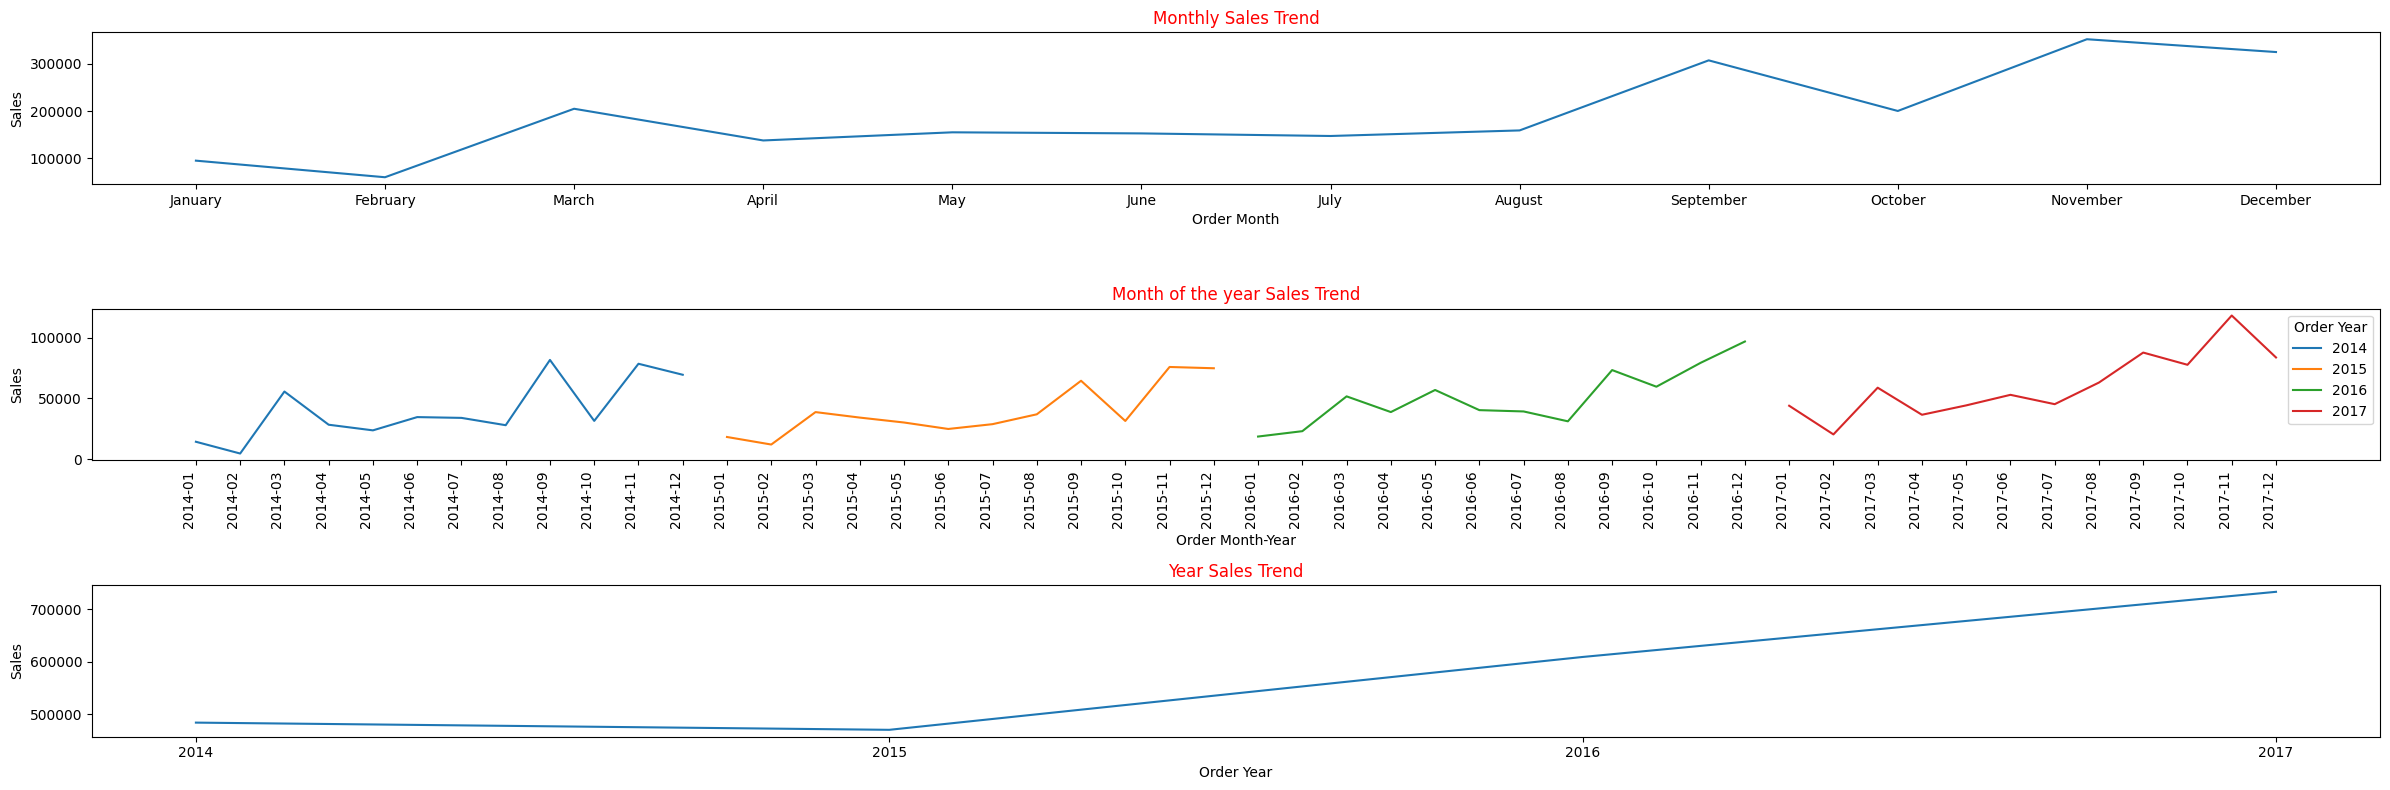

In [13]:
fig ,axs = plt.subplots(3,1 , figsize=(24,8) )
sns.lineplot(monthly_sales , x= 'Order Month' , y='Sales', ax=axs[0])
axs[0].set_title('Monthly Sales Trend',color='r')

sns.lineplot(month_of_year_sales , x= 'Order Month-Year' , y='Sales', ax=axs[1] ,hue='Order Year')
axs[1].set_title('Month of the year Sales Trend',color='r')
axs[1].set_xticks(range(len(month_of_year_sales)), month_of_year_sales['Order Month-Year'], rotation=90, ha='right')


sns.lineplot(year_sales , x= 'Order Year' , y='Sales', ax=axs[2])
axs[2].set_title('Year Sales Trend',color='r')

plt.tight_layout()

## Sales vs Profit 

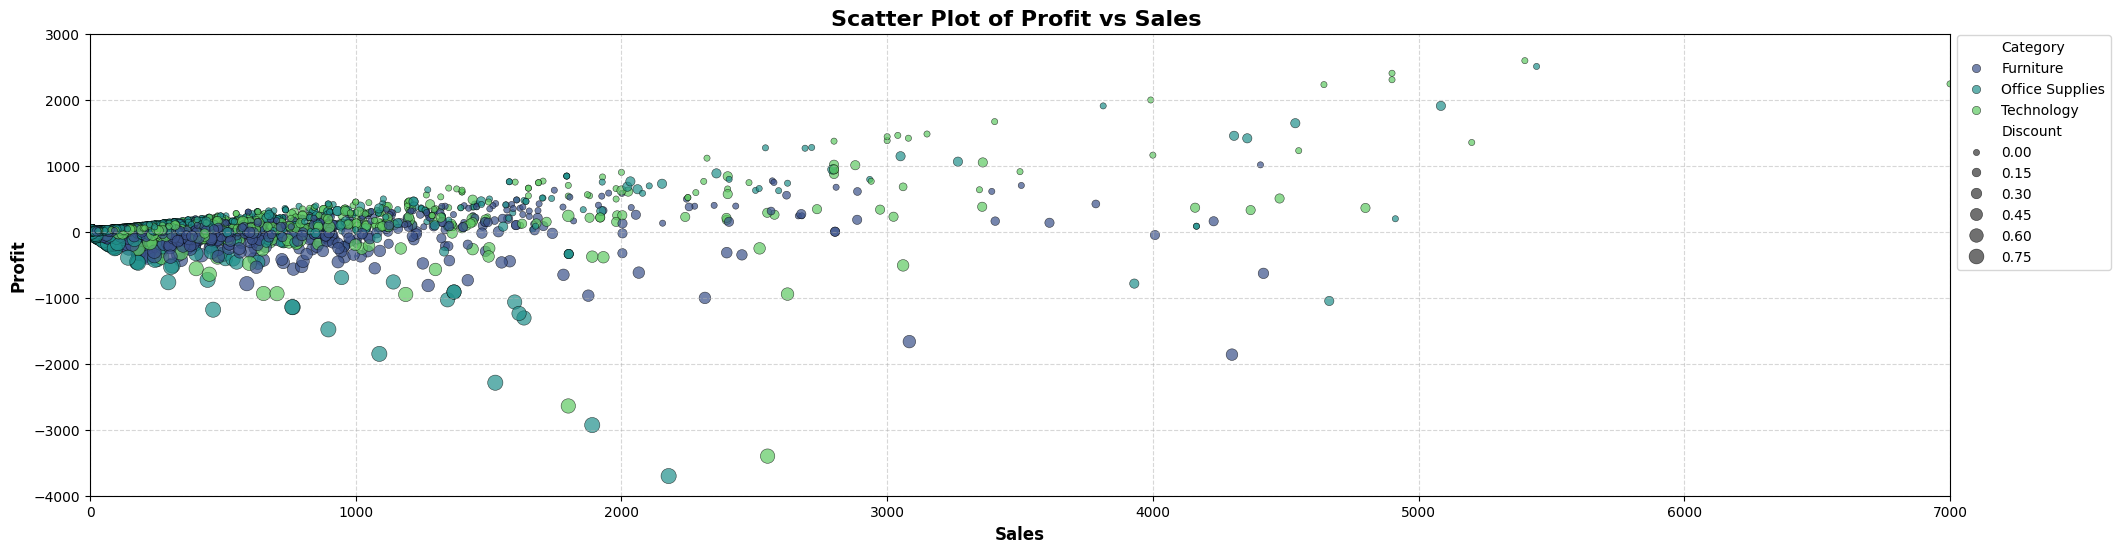

In [27]:
plt.figure(figsize=(24, 6))
sns.scatterplot(data=df, y='Profit', x='Sales', hue='Category', palette='viridis',size='Discount', 
                sizes=(20, 120), edgecolor='black', linewidth=0.4,alpha=0.7)         

plt.title('Scatter Plot of Profit vs Sales ', fontsize=16, weight='bold')
plt.xlabel('Sales', fontsize=12, weight='bold')
plt.ylabel('Profit', fontsize=12, weight='bold')

plt.xlim(0, 7000)
plt.ylim(-4000, 3000)  

plt.legend(loc='upper left', bbox_to_anchor=(1, 1.012), fontsize=10)

plt.grid(True, linestyle='--', alpha=0.5)

## Discount vs Profit

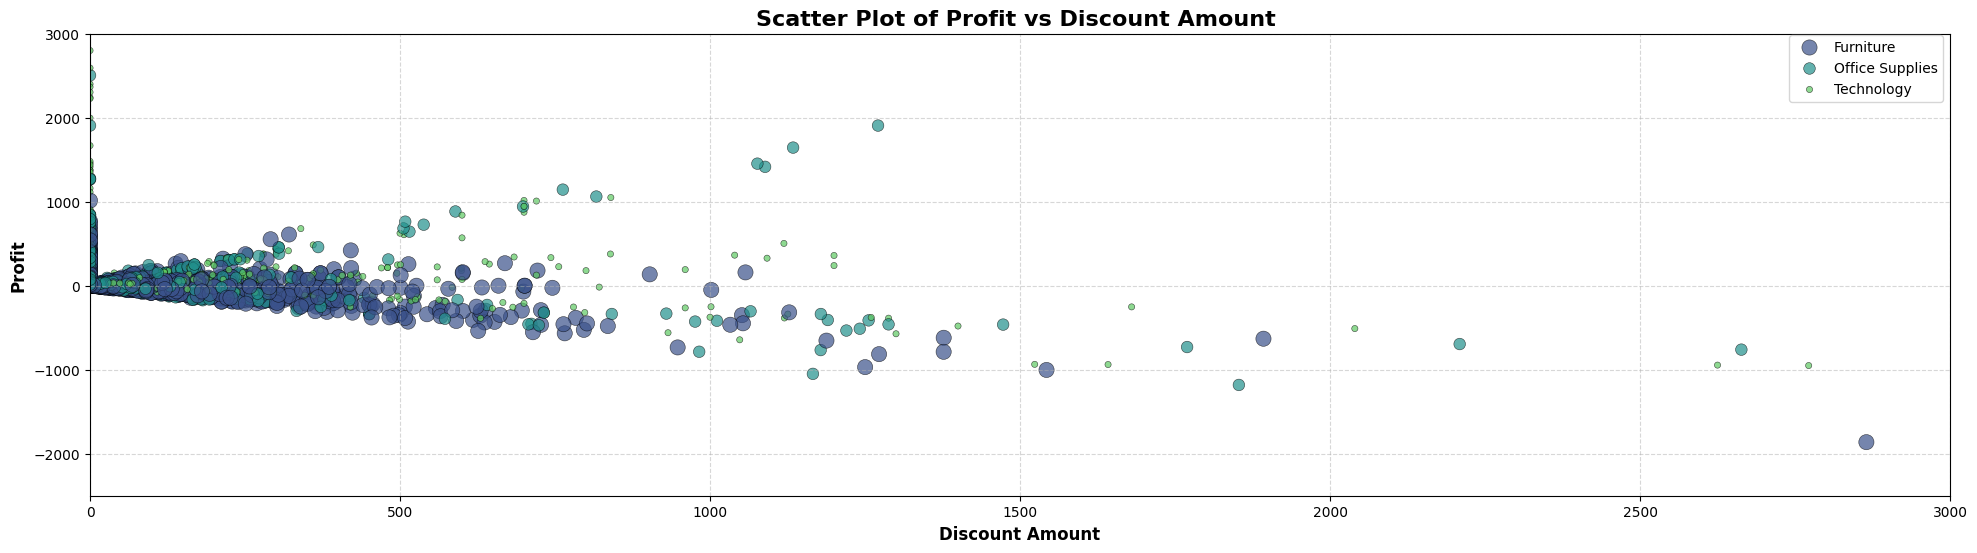

In [36]:
plt.figure(figsize=(24, 6))
sns.scatterplot(data=df, y='Profit', x='Discount Amount', hue='Category', palette='viridis',size='Category', 
                sizes=(20, 120), edgecolor='black', linewidth=0.4,alpha=0.7)         

plt.title('Scatter Plot of Profit vs Discount Amount ', fontsize=16, weight='bold')
plt.xlabel('Discount Amount', fontsize=12, weight='bold')
plt.ylabel('Profit', fontsize=12, weight='bold')

plt.xlim(0, 3000)
plt.ylim(-2500, 3000)  

plt.legend(loc='upper right', bbox_to_anchor=(1, 1.012), fontsize=10)

plt.grid(True, linestyle='--', alpha=0.5)


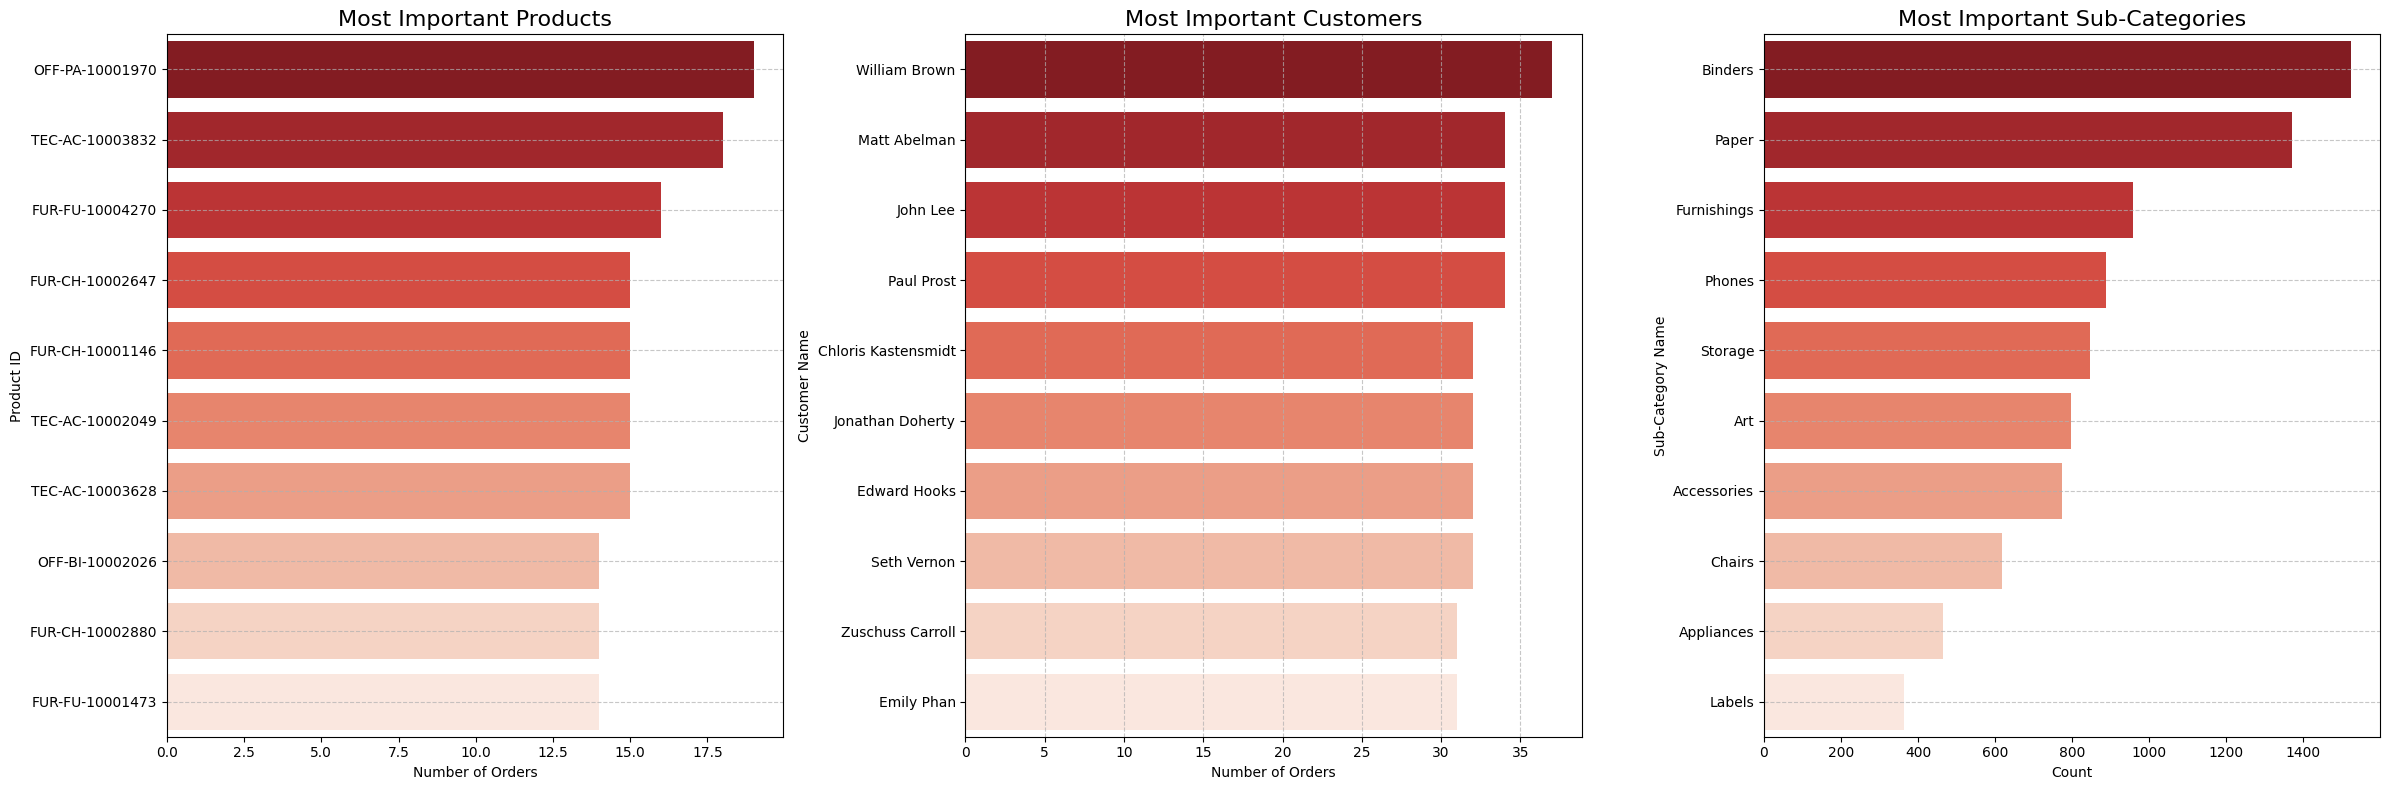

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Plot 1: Most Important Products
product = df['Product ID'].value_counts().reset_index().head(10)
product.columns = ['Product ID', 'Number of Orders']
sns.barplot(
    data=product, x='Number of Orders', y='Product ID', palette='Reds_r', ax=axes[0]
)
axes[0].set_title("Most Important Products", fontsize=16)
axes[0].set_xlabel("Number of Orders")
axes[0].set_ylabel("Product ID")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Most Important Customers
customer = df['Customer Name'].value_counts().reset_index().head(10)
customer.columns = ['Customer Name', 'Number of Orders']
sns.barplot(
    data=customer, x='Number of Orders', y='Customer Name', palette='Reds_r', ax=axes[1]
)
axes[1].set_title("Most Important Customers", fontsize=16)
axes[1].set_xlabel("Number of Orders")
axes[1].set_ylabel("Customer Name")
axes[1].grid(axis='x', linestyle='--', alpha=0.7)

# Plot 3: Most Important Sub-Categories
sub_category = df['Sub-Category'].value_counts().reset_index().head(10)
sub_category.columns = ['Sub-Category Name', 'Count']
sns.barplot(
    data=sub_category, x='Count', y='Sub-Category Name', palette='Reds_r', ax=axes[2]
)
axes[2].set_title("Most Important Sub-Categories", fontsize=16)
axes[2].set_xlabel("Count")
axes[2].set_ylabel("Sub-Category Name")
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

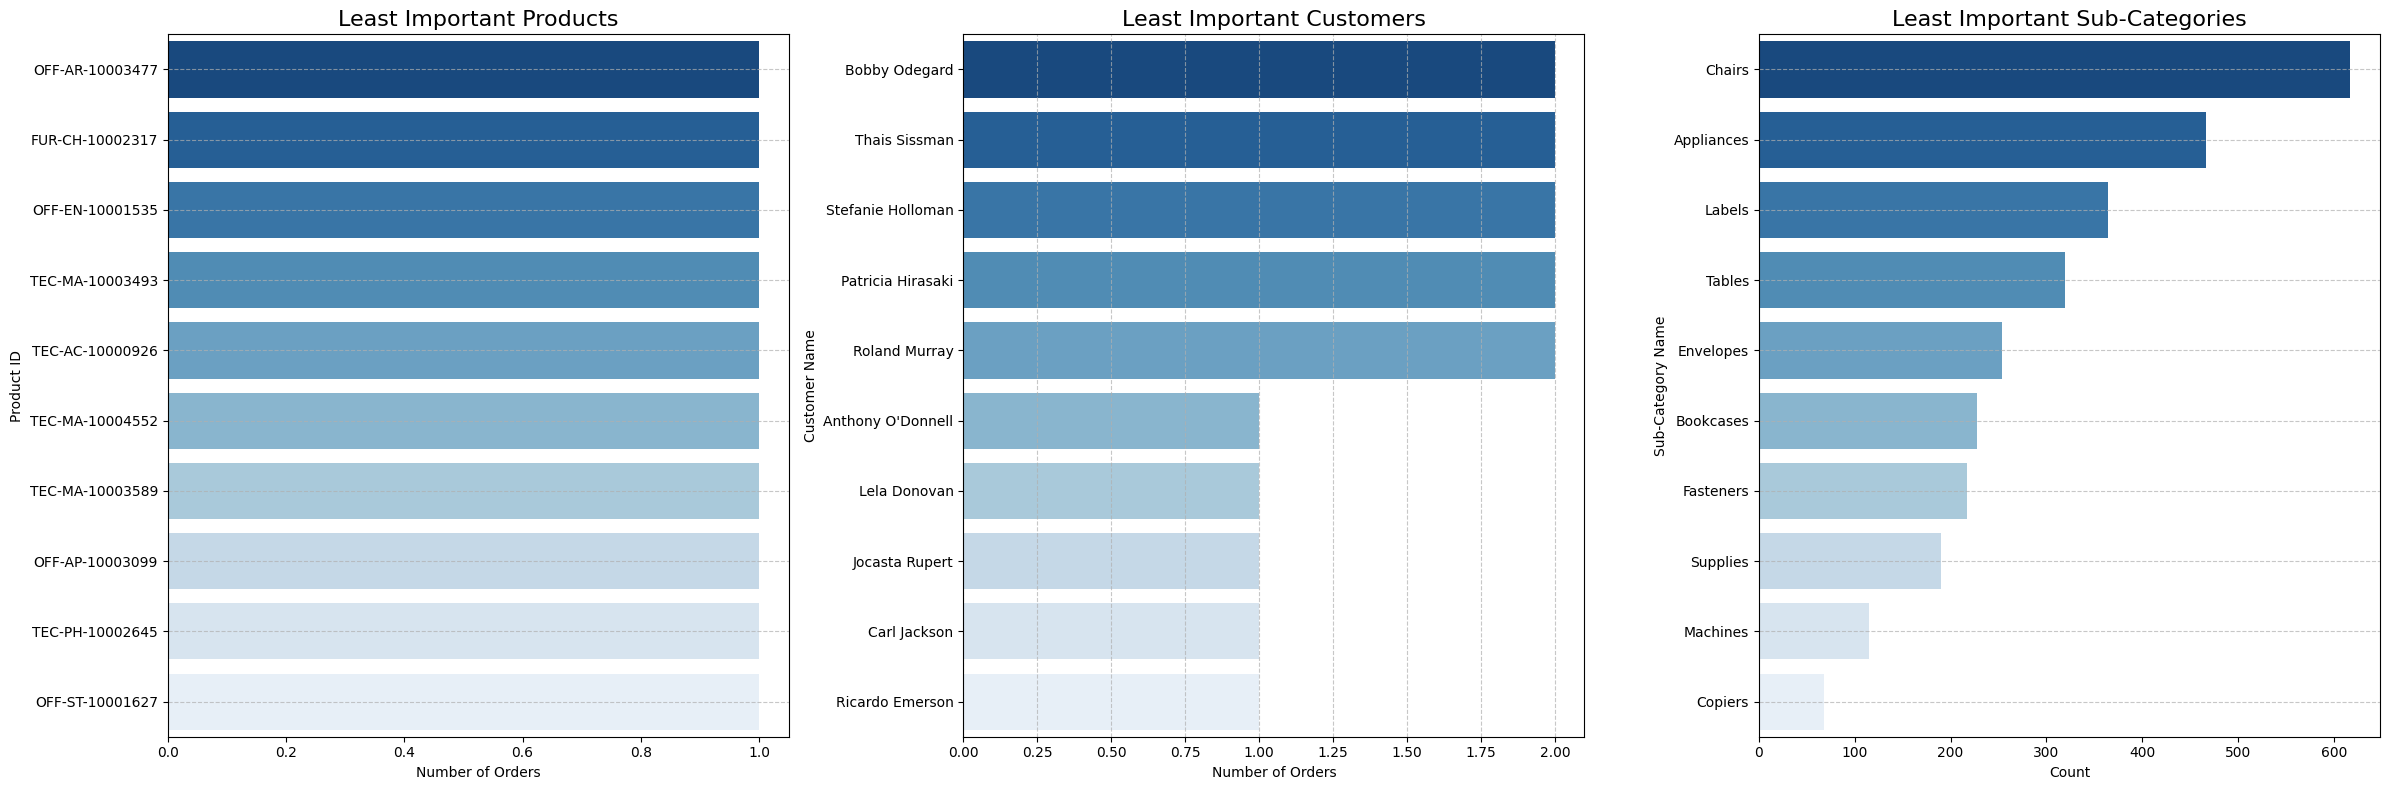

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Plot 1: Least Important Products
product = df['Product ID'].value_counts().reset_index().tail(10)
product.columns = ['Product ID', 'Number of Orders']
sns.barplot(
    data=product, x='Number of Orders', y='Product ID', palette='Blues_r', ax=axes[0]
)
axes[0].set_title("Least Important Products", fontsize=16)
axes[0].set_xlabel("Number of Orders")
axes[0].set_ylabel("Product ID")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Least Important Customers
customer = df['Customer Name'].value_counts().reset_index().tail(10)
customer.columns = ['Customer Name', 'Number of Orders']
sns.barplot(
    data=customer, x='Number of Orders', y='Customer Name', palette='Blues_r', ax=axes[1]
)
axes[1].set_title("Least Important Customers", fontsize=16)
axes[1].set_xlabel("Number of Orders")
axes[1].set_ylabel("Customer Name")
axes[1].grid(axis='x', linestyle='--', alpha=0.7)

# Plot 3: Least Important Sub-Categories
sub_category = df['Sub-Category'].value_counts().reset_index().tail(10)
sub_category.columns = ['Sub-Category Name', 'Count']
sns.barplot(
    data=sub_category, x='Count', y='Sub-Category Name', palette='Blues_r', ax=axes[2]
)
axes[2].set_title("Least Important Sub-Categories", fontsize=16)
axes[2].set_xlabel("Count")
axes[2].set_ylabel("Sub-Category Name")
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

## Categories 

In [17]:
category = df.groupby('Category')['Profit'].sum().sort_values(ascending=False).reset_index()
category
fig = px.pie(category,
            names=category['Category'],
            template='plotly_dark',
            color_discrete_sequence=px.colors.sequential.RdBu,hole=0.4,
            values=category['Profit']
         )


fig.update_layout(
   
   title='Profit precentage for each category ',
   )
fig.show()

## Products vs Sales

In [19]:
Product_sales=df.groupby('Product Name').agg({'Sales':'sum','Quantity':'sum'}).reset_index().sort_values(by='Sales',ascending=False)
fig= px.bar(Product_sales[:10] ,x='Sales' ,y='Product Name', orientation='h' ,color='Quantity' , text = 'Quantity' ,color_continuous_scale='Reds' 
            , title ='The Most selling products in the superstore over Sales amount and Quantity' )
fig.update_traces(textposition='outside') 

## Quantity distribution 

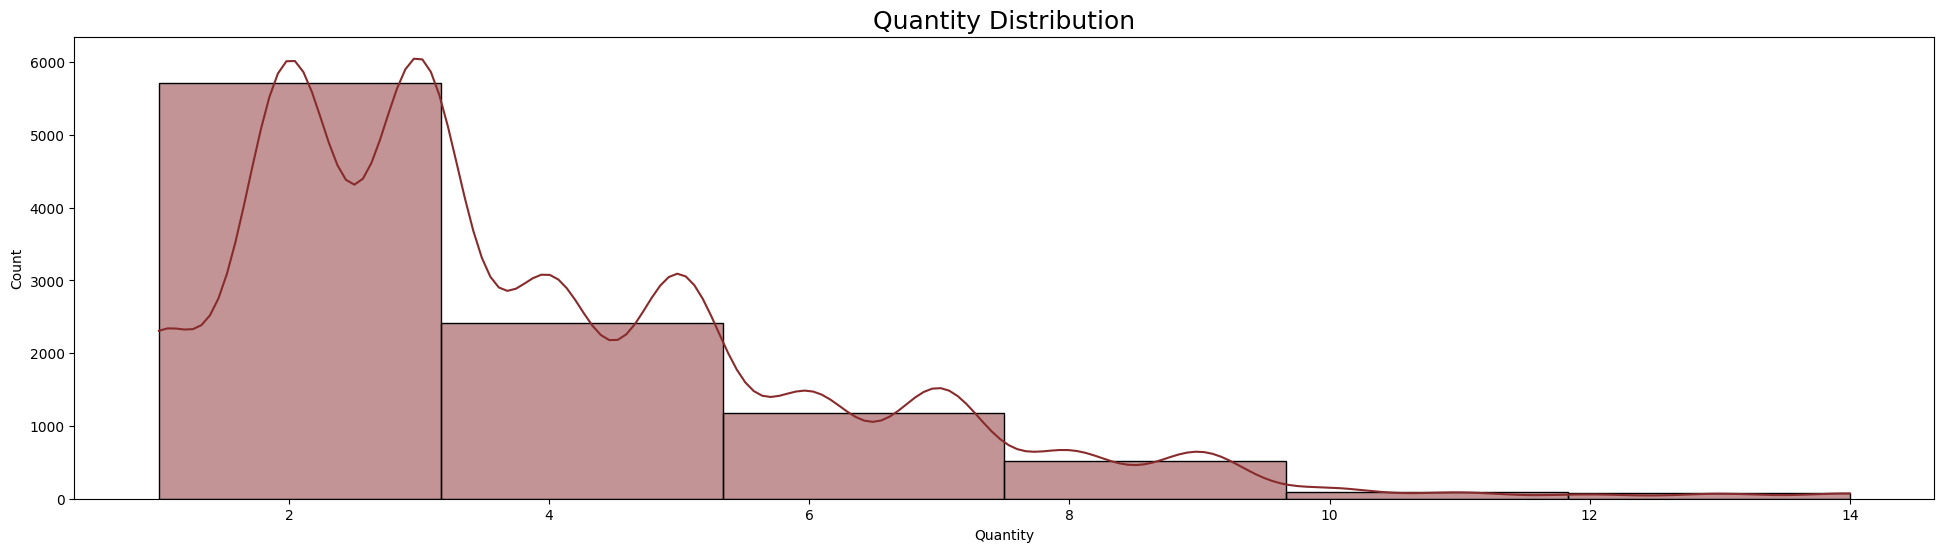

In [20]:
plt.figure(figsize=(24, 6))
sns.histplot(df,x='Quantity',binwidth=2,kde=True,color='#882B2C')
plt.title('Quantity Distribution',size=18)
plt.show()


## Which category of products generates the highest revenue and profit?

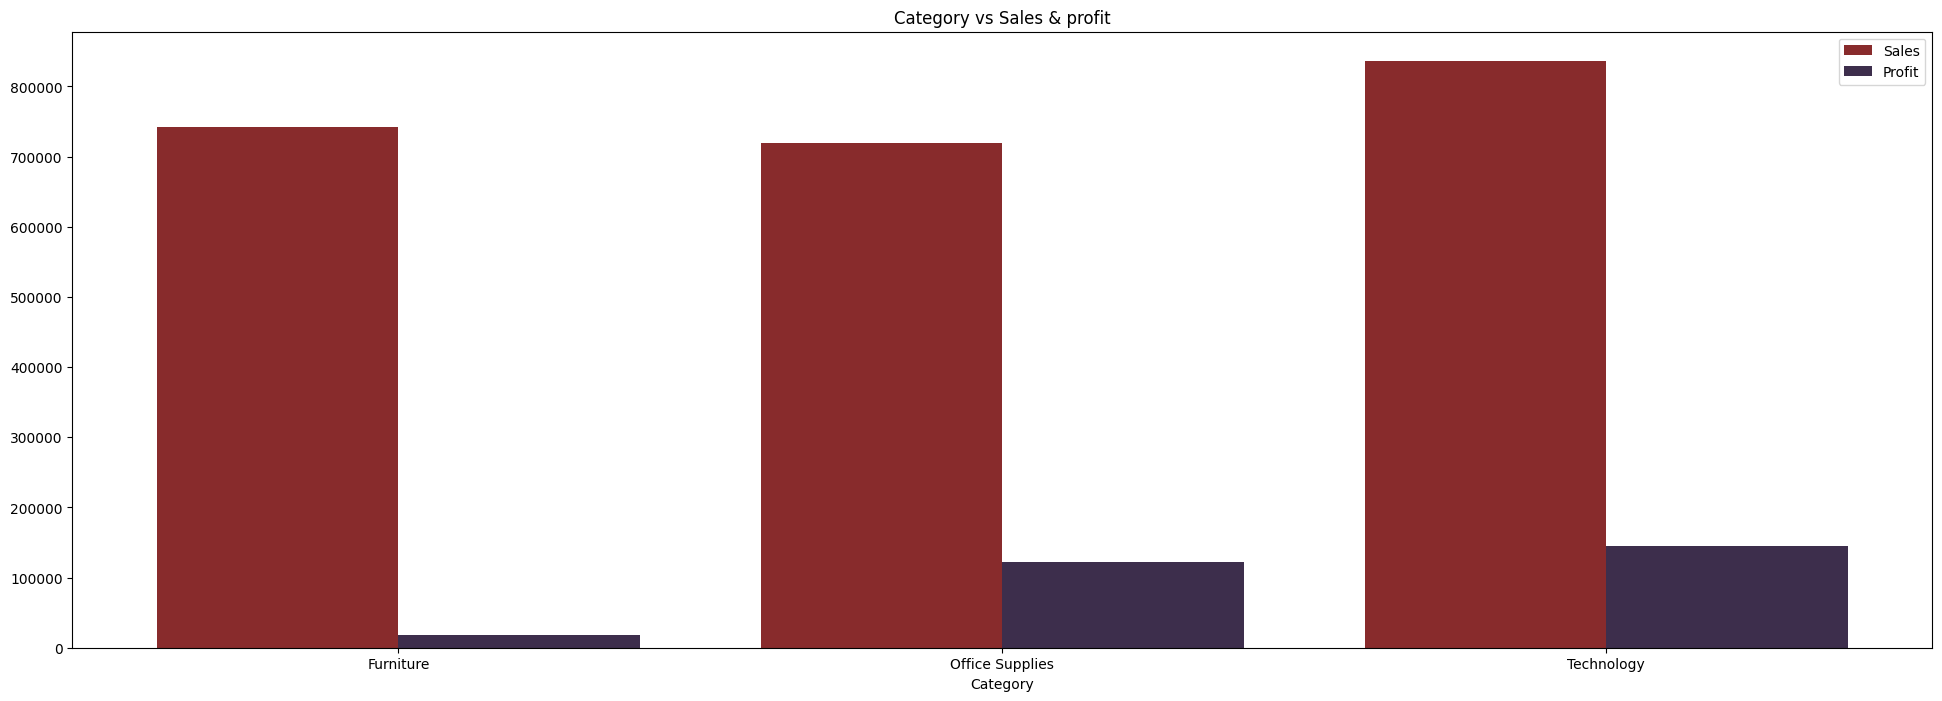

In [21]:
# catregory vs slaes and profit 
plt.figure(figsize=(24, 8))
category_vs_sales_profit =df.groupby('Category').agg({
    'Sales' : 'sum' , 
    'Profit' : 'sum'}).reset_index()
lst= ['Sales','Profit']
x = np.arange(len(category_vs_sales_profit['Category']))

plt.bar(x-.2  ,category_vs_sales_profit['Sales'] , .4 ,label ='Sales',color='#882B2C')
plt.bar(x+.2  ,category_vs_sales_profit['Profit'] , .4 ,label = 'Profit',color='#3D2E4C')
plt.xticks(x , category_vs_sales_profit['Category'])


plt.xlabel('Category')
plt.title("Category vs Sales & profit")
plt.legend(loc = 'upper right')
plt.show()

## What is the average profit margin for each product category?

Text(0.5, 1.0, 'Profit Margin per Category')

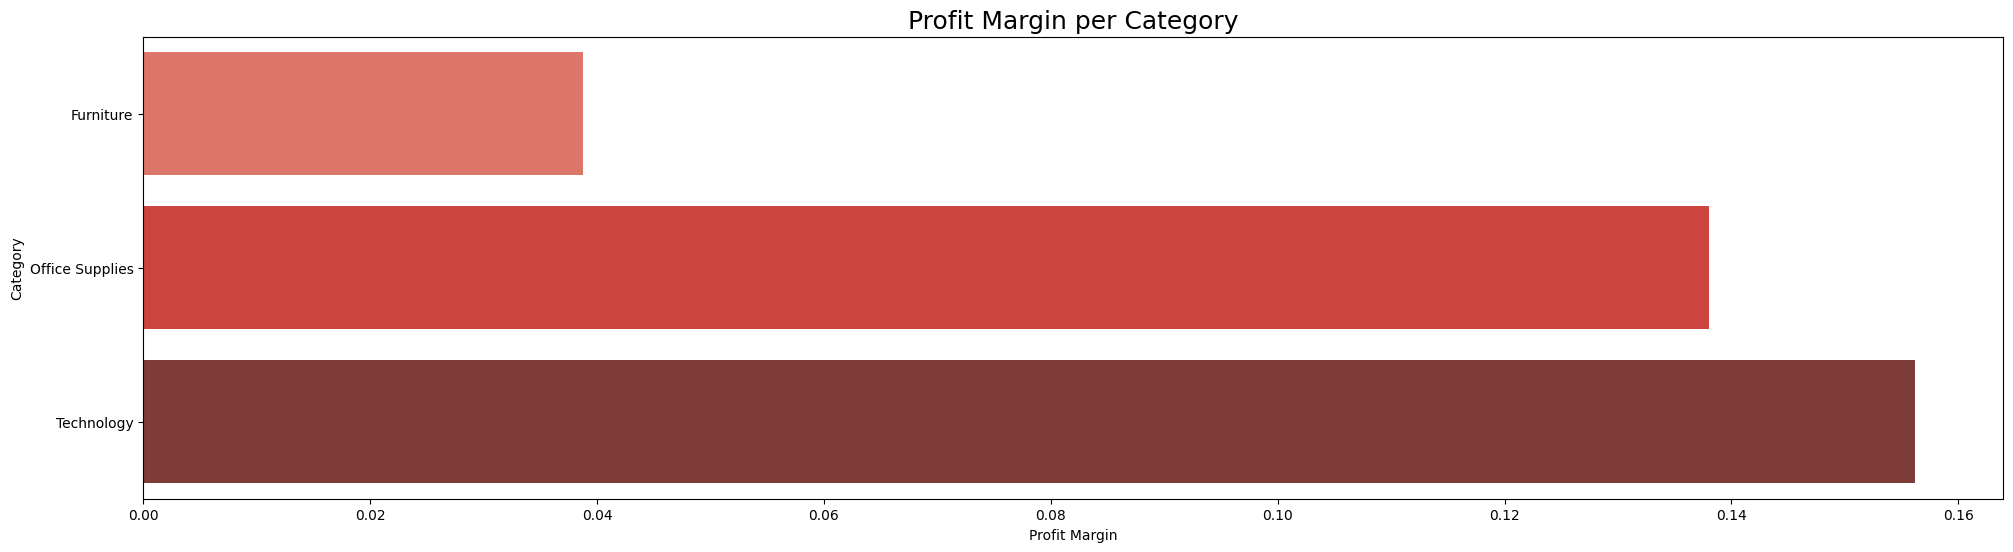

In [22]:
plt.figure(figsize=(24, 6))
df['Profit Margin'] =df['Profit']/df['Sales']
margine_per_category = df.groupby('Category')['Profit Margin'].mean().reset_index()
sns.barplot(margine_per_category,x='Profit Margin',y= 'Category',palette='Reds_d')
plt.title('Profit Margin per Category',size=18)



## Which region and City generates the most sales?

Text(0.5, 1.0, 'Top States by Sales')

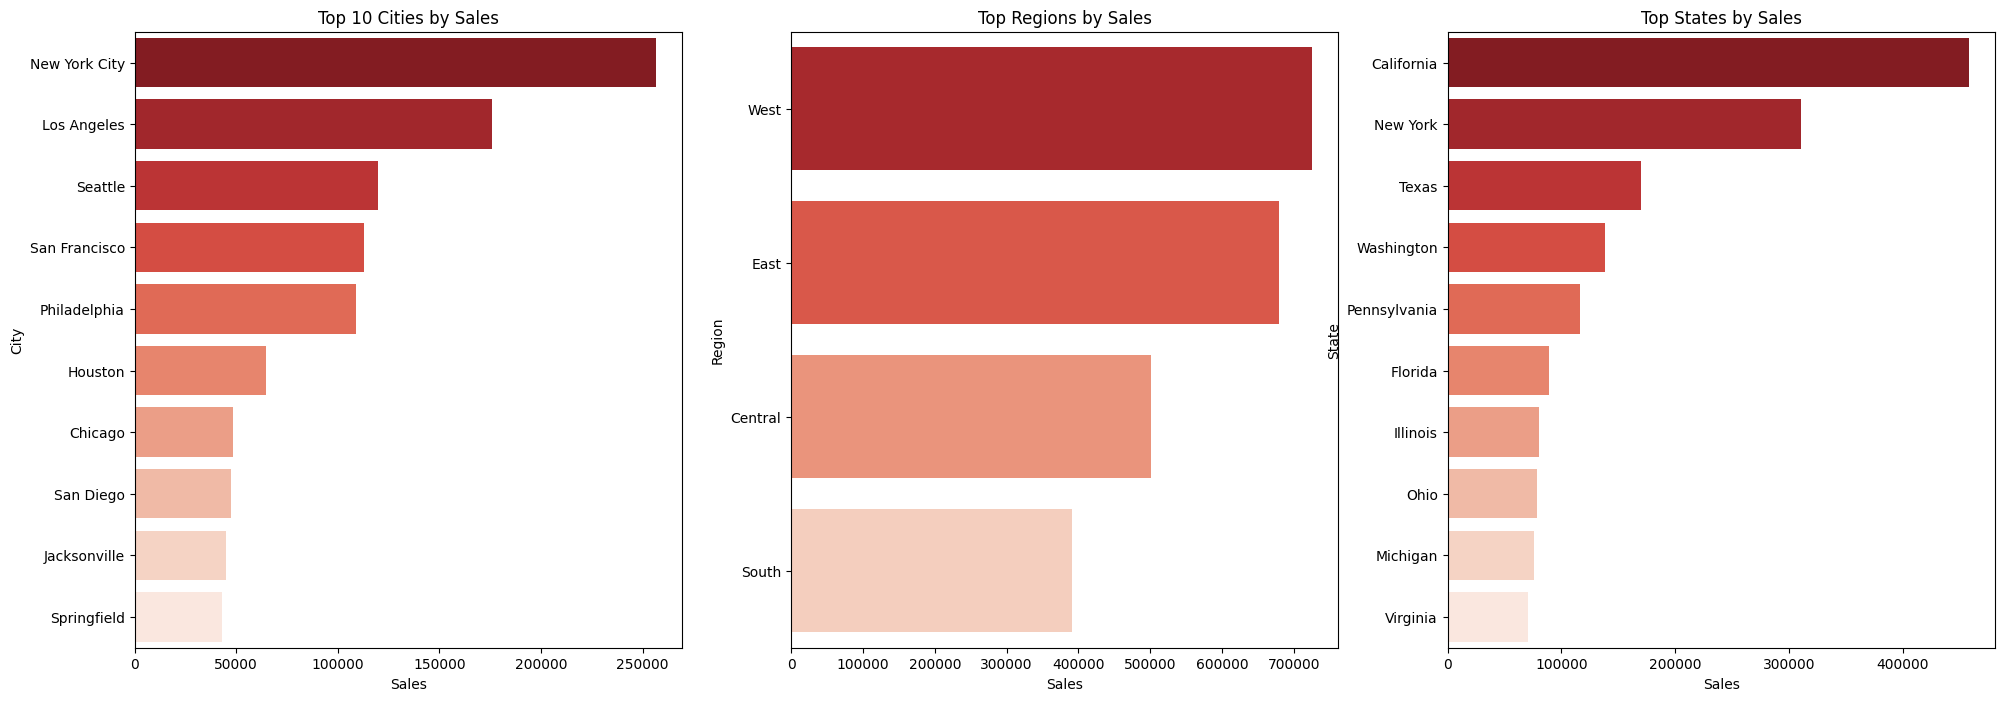

In [23]:
plt.figure(figsize=(24, 8))
plt.subplot(1,3,1)
city_vs_sales = df.groupby('City')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False).head(10)
sns.barplot(city_vs_sales,x='Sales' , y='City',palette='Reds_r')
plt.title('Top 10 Cities by Sales')

plt.subplot(1,3,2)
region_vs_profit = df.groupby('Region')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False).head(10)
sns.barplot(region_vs_profit,x='Sales' , y='Region',palette='Reds_r')
plt.title('Top Regions by Sales')

plt.subplot(1,3,3)
state_vs_profit = df.groupby('State')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False).head(10)
sns.barplot(state_vs_profit,x='Sales' , y='State',palette='Reds_r')
plt.title('Top States by Sales')

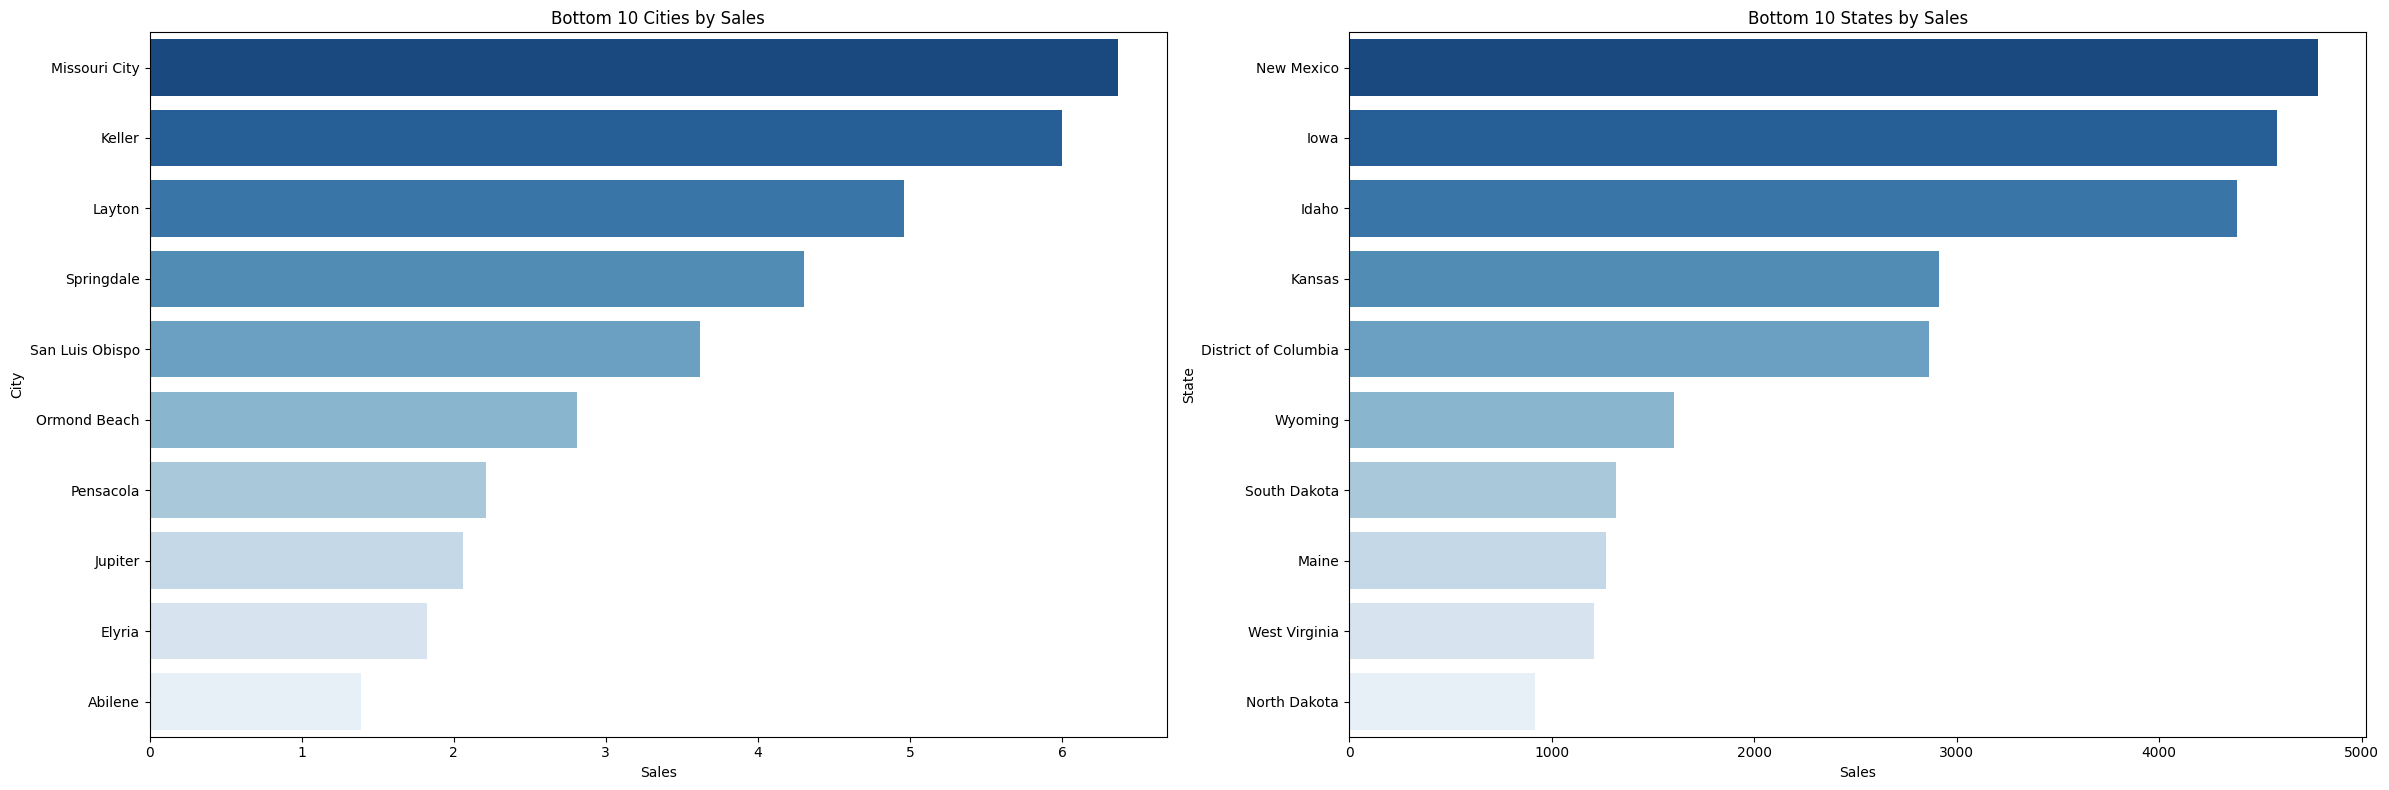

In [58]:
plt.figure(figsize=(24, 8))
# Plot 1: Bottom 10 Cities by Sales
plt.subplot(1, 2, 1)
city_vs_sales = df.groupby('City')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False).tail(10)
sns.barplot(data=city_vs_sales, x='Sales', y='City', palette='Blues_r')
plt.title('Bottom 10 Cities by Sales')

# Plot 2: Bottom 10 States by Sales
plt.subplot(1, 2, 2)
state_vs_sales = df.groupby('State')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False).tail(10)
sns.barplot(data=state_vs_sales, x='Sales', y='State', palette='Blues_r')
plt.title('Bottom 10 States by Sales')

# Adjust layout
plt.tight_layout()
plt.show()

## What is the impact of discounts and promotions on sales?

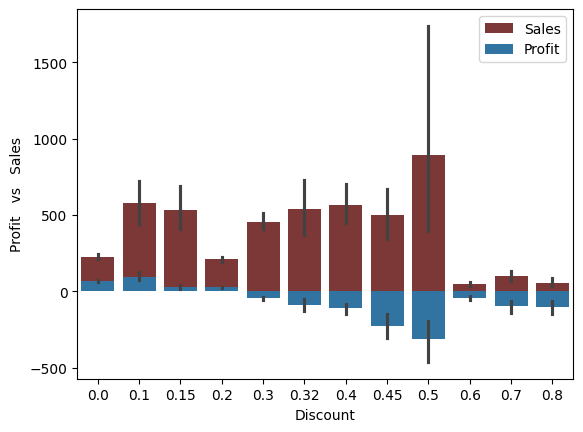

In [24]:
sns.barplot(df , x='Discount',y='Sales' ,label = 'Sales',color='#882B2C')
sns.barplot(df , x='Discount',y='Profit' , label = 'Profit')
plt.ylabel('Profit   vs   Sales')
plt.show()

## The best sales are in 50% discount, but lead's to loss and non-profitablility.
## The Discount between 10 to 20% is the best solution as it gets better sales with good profitability.

## Profit by state & country & region

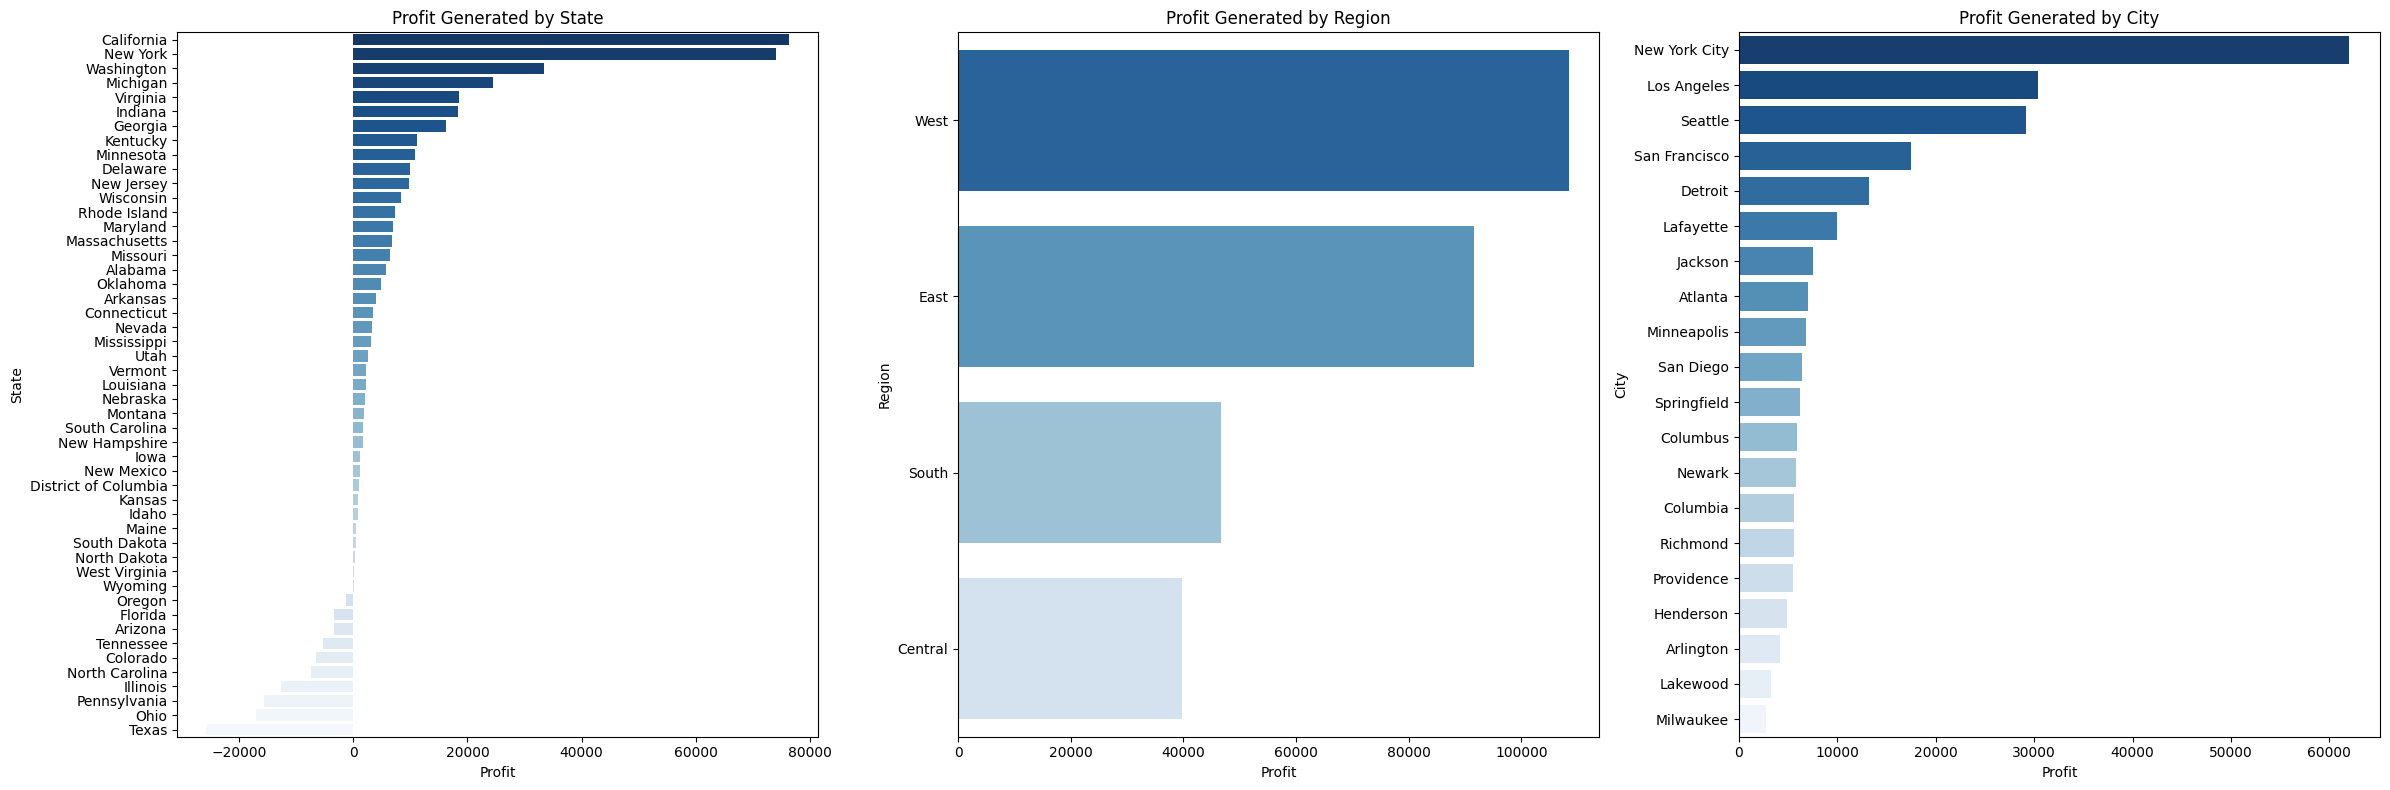

In [65]:
plt.figure(figsize=(24, 8))
# Plot 1: Profit by State
plt.subplot(1, 3, 1)
state = df.groupby('State')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
sns.barplot(data=state, x='Profit', y='State', palette='Blues_r')
plt.xlabel("Profit")
plt.ylabel("State")
plt.title("Profit Generated by State")

# Plot 2: Profit by Region
plt.subplot(1, 3, 2)
region = df.groupby('Region')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
sns.barplot(data=region, x='Profit', y='Region', palette='Blues_r')
plt.xlabel("Profit")
plt.ylabel("Region")
plt.title("Profit Generated by Region")

# Plot 3: Profit by City
plt.subplot(1, 3, 3)
city = df.groupby('City')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False).head(20)  # Showing top 20 cities for better visualization
sns.barplot(data=city, x='Profit', y='City', palette='Blues_r')
plt.xlabel("Profit")
plt.ylabel("City")
plt.title("Profit Generated by City")

# Adjust layout
plt.tight_layout()
plt.show()

## The relation between numeric features

Text(1296.7222222222224, 0.5, 'Features')

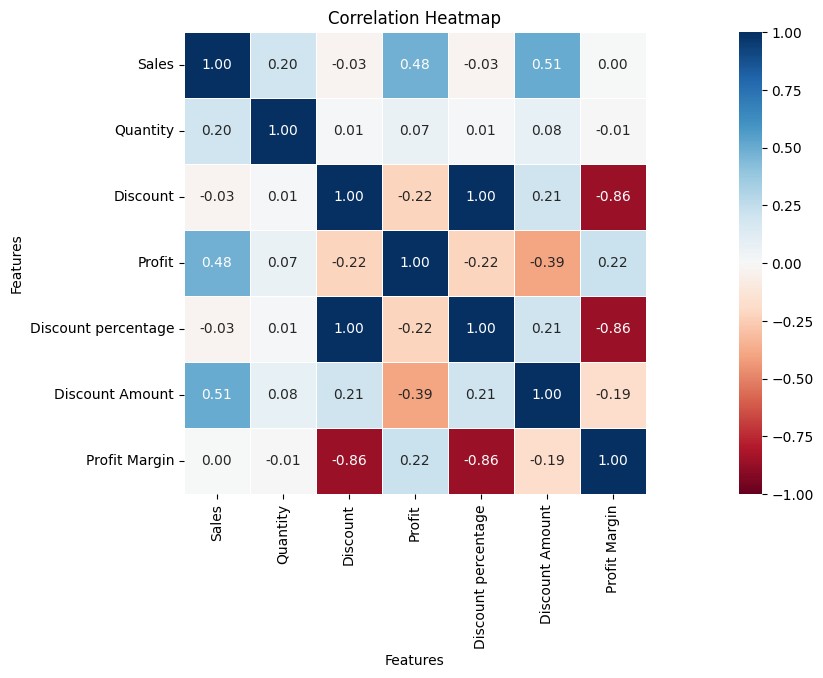

In [25]:
numeric_features = df.select_dtypes(include=['float64', 'int64'])
numeric_features = numeric_features.drop(['Postal Code', 'Row ID'], axis=1)
corr=numeric_features.corr()
plt.figure(figsize=(24, 6))
sns.heatmap(corr,cmap='RdBu',
            vmax=1,vmin=-1,
            annot=True,
            square=True,
            fmt = "0.2f", 
            linewidth = 0.5)
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
# Discount is negative correlated with profit ,and sales with profit is positive correlated.